# Settings

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

## 💗Download Data

In [1]:
!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000240/data/data.tar.gz

--2023-05-18 17:07:13--  https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000240/data/data.tar.gz
Resolving aistages-prod-server-public.s3.amazonaws.com (aistages-prod-server-public.s3.amazonaws.com)... 52.218.247.219, 52.218.220.91, 52.92.129.153, ...
Connecting to aistages-prod-server-public.s3.amazonaws.com (aistages-prod-server-public.s3.amazonaws.com)|52.218.247.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20249870 (19M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  19.31M  7.20MB/s    in 2.7s    

2023-05-18 17:07:17 (7.20 MB/s) - ‘data.tar.gz’ saved [20249870/20249870]



In [2]:
!tar -xzvf data.tar.gz

data/
data/train_data.csv
data/test_data.csv
data/sample_submission.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/train_data.csv')

## dataprep (before convert dtype)

In [5]:
#from dataprep.eda import create_report


# report = create_report(df,title = "DKT Test Data EDA")
# report.save('DKT_EDA.html')

# report.show_browser()
# report.show()

In [25]:
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 103.8+ MB


## 💗rename features

In [26]:
df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag'],
      dtype='object')

In [5]:
df.rename(columns={'userID': 'user_id', 'assessmentItemID':'question_id', 'testId':'test_id'
      , 'answerCode':'answer_code', 'Timestamp':'timestamp', 'KnowledgeTag':'knowledge_tag'},inplace=True)

In [6]:
df.columns

Index(['user_id', 'question_id', 'test_id', 'answer_code', 'timestamp',
       'knowledge_tag'],
      dtype='object')

# EDA

In [16]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [17]:
df.describe()

,userID,answerCode,KnowledgeTag
count,2.266586e+06,2.266586e+06,2.266586e+06
mean,2.087687e+03,6.543784e-01,4.909007e+03
std,1.589365e+03,4.755706e-01,3.302214e+03
min,0.000000e+00,0.000000e+00,2.300000e+01
25%,8.000000e+02,0.000000e+00,1.931000e+03
50%,1.748000e+03,1.000000e+00,5.258000e+03
75%,3.046000e+03,1.000000e+00,7.913000e+03
max,7.441000e+03,1.000000e+00,1.127100e+04


In [18]:
test_df = pd.read_csv('/content/data/test_data.csv')
test_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623


In [19]:
test_df.shape

(260114, 6)

## user_id

In [ ]:
df.value_counts('user_id')

user_id
730     1860
481     1847
1112    1777
394     1774
926     1773
        ... 
7396      14
7414      13
7390      13
7252      13
7441       9
Length: 6698, dtype: int64

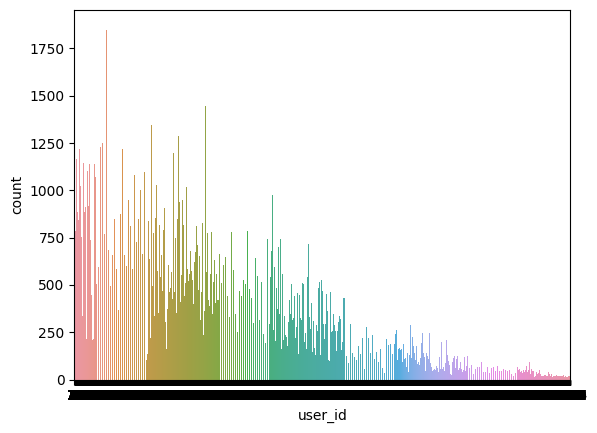

In [ ]:
# userID가 작을수록 문제를 더 많이 푼 것을 알 수 있다.
sns.countplot(x='user_id',data=df)
plt.show()

## test_id

In [ ]:
df['test_id']

0          A060000001
1          A060000001
2          A060000001
3          A060000001
4          A060000001
              ...    
2266581    A030000071
2266582    A040000165
2266583    A040000165
2266584    A040000165
2266585    A040000165
Name: test_id, Length: 2266586, dtype: object

### 💗Feature 생성 : **test_cat**

In [7]:
df['test_cat'] = df['test_id'].apply(lambda x: x[1:7][1])

In [8]:
df.head()

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6


In [30]:
#대분류(test_cat)별로 test_id가 어떻게 분포되어 있는지 확인
count_test_by_cat = df.groupby('test_cat').agg({'test_id':'count', 'answer_code':'mean'})
count_test_by_cat

,test_id,answer_code
test_cat,,
1,272082,0.800876
2,268327,0.737593
3,273762,0.702238
4,267323,0.684056
5,275773,0.658208
6,264434,0.709232
7,279164,0.521876
8,246336,0.502598
9,119385,0.449948


In [ ]:
sum(count_test_by_cat['test_id']) == len(df)

True

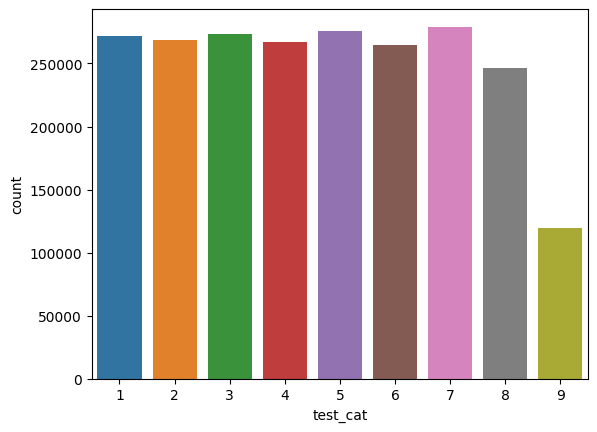

In [ ]:
sns.barplot(x=count_test_by_cat.index, y='test_id', data=count_test_by_cat)
plt.ylabel('count')
plt.show()

## question_id

In [9]:
df['question_id']

0          A060001001
1          A060001002
2          A060001003
3          A060001004
4          A060001005
              ...    
2266581    A030071005
2266582    A040165001
2266583    A040165002
2266584    A040165003
2266585    A040165004
Name: question_id, Length: 2266586, dtype: object

### 💗Feature 생성: question_numeric_id
문항 번호

In [10]:
df['question_numeric_id'] = df['question_id'].apply(lambda x:int(x[7:]))

In [11]:
df.head()

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5


### 💗Feature 생성: total_qnum
하나의 test에 대한 총 question 개수

In [12]:
df_subset = df.groupby('test_id')['question_id'].nunique().reset_index()
df_subset.columns = ['test_id', 'total_qnum']
df_subset

,test_id,total_qnum
0,A010000001,5
1,A010000002,5
2,A010000003,5
3,A010000004,5
4,A010000005,5
...,...,...
1532,A090000070,8
1533,A090000071,8
1534,A090000072,6
1535,A090000073,6


In [13]:
df = df.merge(df_subset,on='test_id',how='left')
df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5,6
...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,5,5
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,3,4


## timestamp

In [14]:
df[df['timestamp'].isnull() == True]

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum


In [15]:
print("first: ", min(df['timestamp']))
print("last: ", df['timestamp'].max())

first:  2019-12-31 15:08:01
last:  2020-12-29 16:46:21


### 💗Feature 생성: spend_time

In [16]:
spent_df = df.copy()
spent_df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5,6
...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,5,5
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,3,4


In [17]:
spent_df = spent_df.sort_values(['user_id','test_id', 'timestamp'], ascending=[True, True, True]) #user와 test로 groupby하여 유저가 새로운 test를 풀 때마다 
                                                                                                #spend_time 초기화시키는 효과를 주고자하였다.
spent_df['time_shift'] = spent_df.groupby(['user_id','test_id'])['timestamp'].shift()
spent_df['timestamp'] = pd.to_datetime(spent_df['timestamp'])
spent_df['time_shift'] = pd.to_datetime(spent_df['time_shift'])
spent_df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,time_shift
584,0,A020172001,A020000172,1,2020-10-11 11:06:47,8132,2,1,6,NaT
585,0,A020172002,A020000172,1,2020-10-11 11:06:56,8132,2,2,6,2020-10-11 11:06:47
586,0,A020172003,A020000172,1,2020-10-11 11:07:13,8132,2,3,6,2020-10-11 11:06:56
587,0,A020172004,A020000172,1,2020-10-11 11:07:46,8132,2,4,6,2020-10-11 11:07:13
588,0,A020172005,A020000172,0,2020-10-11 11:08:20,8132,2,5,6,2020-10-11 11:07:46
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,5,5,2020-06-05 06:49:57
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4,NaT
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4,2020-08-21 01:06:39
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,3,4,2020-08-21 01:06:50


In [18]:
spent_df['spend_time'] = spent_df['timestamp'] - spent_df['time_shift']
spent_df['spend_time'] = spent_df['spend_time'].shift(-1) #timestamp는 문제를 풀기 시작한 feature이므로 한 row씩 뒤로 이동시킨다.
spent_df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,time_shift,spend_time
584,0,A020172001,A020000172,1,2020-10-11 11:06:47,8132,2,1,6,NaT,0 days 00:00:09
585,0,A020172002,A020000172,1,2020-10-11 11:06:56,8132,2,2,6,2020-10-11 11:06:47,0 days 00:00:17
586,0,A020172003,A020000172,1,2020-10-11 11:07:13,8132,2,3,6,2020-10-11 11:06:56,0 days 00:00:33
587,0,A020172004,A020000172,1,2020-10-11 11:07:46,8132,2,4,6,2020-10-11 11:07:13,0 days 00:00:34
588,0,A020172005,A020000172,0,2020-10-11 11:08:20,8132,2,5,6,2020-10-11 11:07:46,0 days 00:01:41
...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,5,5,2020-06-05 06:49:57,NaT
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4,NaT,0 days 00:00:11
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4,2020-08-21 01:06:39,0 days 00:00:46
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,3,4,2020-08-21 01:06:50,0 days 00:01:13


In [19]:
#spend_time의 type을 int형으로 변환해준다.
spent_df['spend_time'] = spent_df['spend_time'].dt.total_seconds()
spent_df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,time_shift,spend_time
584,0,A020172001,A020000172,1,2020-10-11 11:06:47,8132,2,1,6,NaT,9.0
585,0,A020172002,A020000172,1,2020-10-11 11:06:56,8132,2,2,6,2020-10-11 11:06:47,17.0
586,0,A020172003,A020000172,1,2020-10-11 11:07:13,8132,2,3,6,2020-10-11 11:06:56,33.0
587,0,A020172004,A020000172,1,2020-10-11 11:07:46,8132,2,4,6,2020-10-11 11:07:13,34.0
588,0,A020172005,A020000172,0,2020-10-11 11:08:20,8132,2,5,6,2020-10-11 11:07:46,101.0
...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,5,5,2020-06-05 06:49:57,NaN
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4,NaT,11.0
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4,2020-08-21 01:06:39,46.0
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,3,4,2020-08-21 01:06:50,73.0


In [20]:
#기존 df에 spend_time 칼럼을 추가해준다.
df = pd.concat([df,spent_df['spend_time']],axis=1)
df.head()

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,spend_time
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,6,3.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2,6,8.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3,6,7.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4,6,7.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5,6,11.0


#### **(🧙TODO)**spend_time 결측값
각 test의 마지막 문제에 대한 user의 spend_time을 알 수 없음.

#### **(🧙TODO)**spend_time 이상치

### (🧙TODO)Feature 생성: 문제 난이도(걸린 시간, 문제 정답률, 풀어진 횟수 등 고려)

회귀분석 or 분류(상,중,하로 분류)

## feature간 상관관계 확인

In [147]:
df.head()

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,spend_time
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,6,3.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2,6,8.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3,6,7.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4,6,7.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5,6,11.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266586 entries, 0 to 2266585
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              int64  
 1   question_id          object 
 2   test_id              object 
 3   answer_code          int64  
 4   timestamp            object 
 5   knowledge_tag        int64  
 6   test_cat             int64  
 7   question_numeric_id  int64  
 8   total_qnum           int64  
 9   spend_time           float64
dtypes: float64(1), int64(6), object(3)
memory usage: 190.2+ MB


In [149]:
df['test_cat'] = df['test_cat'].astype('int')
df['question_numeric_id'] = df['question_numeric_id'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266586 entries, 0 to 2266585
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              int64  
 1   question_id          object 
 2   test_id              object 
 3   answer_code          int64  
 4   timestamp            object 
 5   knowledge_tag        int64  
 6   test_cat             int64  
 7   question_numeric_id  int64  
 8   total_qnum           int64  
 9   spend_time           float64
dtypes: float64(1), int64(6), object(3)
memory usage: 190.2+ MB


<ipython-input-150-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


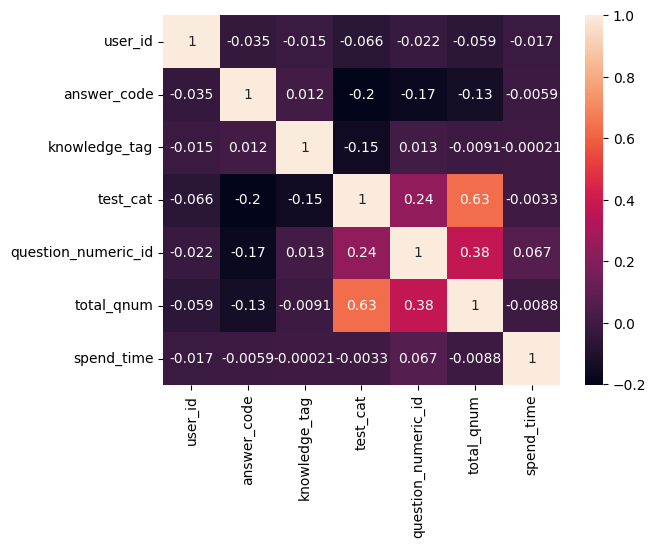

In [150]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### spend_time과 정답률 관계
spend_time의 범위를 나누어 answer_code의 평균값을 통해 두 feature 간의 관계를 알아보고자 한다.

In [48]:
time_df = df.copy()
time_df = df[df['spend_time']<600] #문제를 푼 소요시간이 10분 이내인 data만 불러온다.
time_df

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,spend_time
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,6,3.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,2,6,8.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,3,6,7.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,4,6,7.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,5,6,11.0
...,...,...,...,...,...,...,...,...,...,...
2266579,7441,A030071003,A030000071,1,2020-06-05 06:49:23,438,3,3,5,34.0
2266580,7441,A030071004,A030000071,0,2020-06-05 06:49:57,438,3,4,5,24.0
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,4,11.0
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,2,4,46.0


In [55]:
# spend_time을 3초 단위로 구간화하여 새로운 칼럼인 'spend_time_group'을 추가
time_df['spend_time_group'] = pd.cut(time_df['spend_time'], bins=np.arange(0, df['spend_time'].max() + 3, 3),right=False)
time_df['spend_time_group'].unique()

/tmp/ipykernel_49380/3669308994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['spend_time_group'] = pd.cut(time_df['spend_time'], bins=np.arange(0, df['spend_time'].max() + 3, 3),right=False)


[[3.0, 6.0), [6.0, 9.0), [9.0, 12.0), [63.0, 66.0), [15.0, 18.0), ..., [597.0, 600.0), [564.0, 567.0), [594.0, 597.0), [573.0, 576.0), [582.0, 585.0)]
Length: 200
Categories (9565293, interval[float64, left]): [[0.0, 3.0) < [3.0, 6.0) < [6.0, 9.0) < [9.0, 12.0) ... [28695867.0, 28695870.0) < [28695870.0, 28695873.0) < [28695873.0, 28695876.0) < [28695876.0, 28695879.0)]

In [56]:
# spend_time_group을 기준으로 그룹화하고, 각 그룹의 answer_code 평균을 계산
grouped = time_df.groupby('spend_time_group')['answer_code'].mean().reset_index()
grouped.dropna(axis=0, inplace=True)      

In [57]:
grouped['spend_time_group'] = grouped['spend_time_group'].apply(lambda x:x.right).astype(int)
grouped

,spend_time_group,answer_code
0,3,0.252496
1,6,0.293419
2,9,0.565640
3,12,0.715626
4,15,0.758699
...,...,...
195,588,0.761702
196,591,0.759259
197,594,0.770335
198,597,0.733624


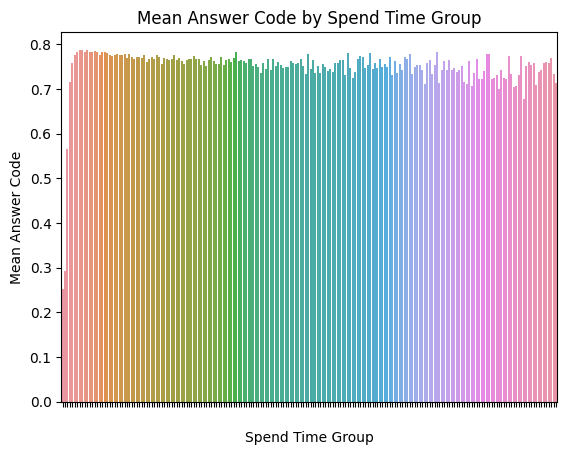

In [69]:
# barplot 그리기
sns.barplot(data=grouped, x='spend_time_group', y='answer_code')
plt.xlabel('Spend Time Group')
plt.ylabel('Mean Answer Code')
plt.title('Mean Answer Code by Spend Time Group')
plt.xticks(color='w')
plt.show()

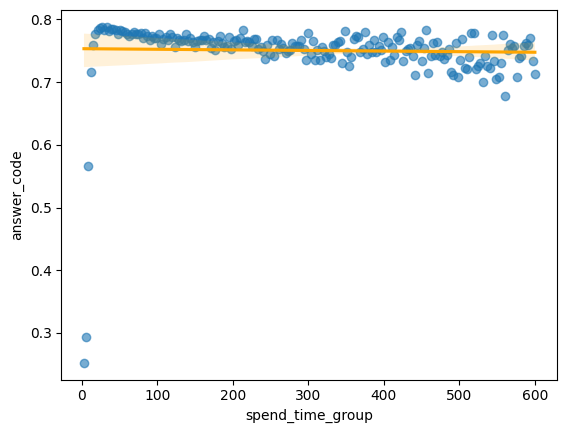

In [59]:
g = sns.regplot(
    data=grouped,
    x='spend_time_group',
    y='answer_code',
    scatter_kws={'alpha':0.6},
    line_kws={"color": "orange"})

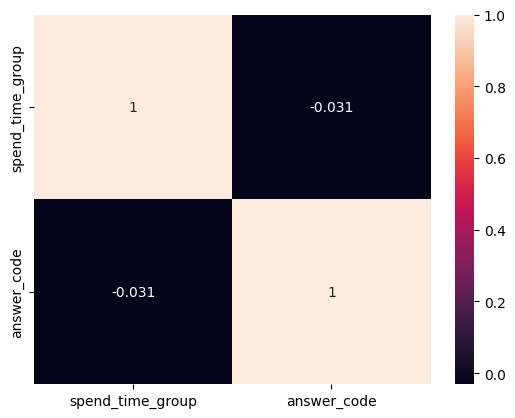

In [60]:
sns.heatmap(grouped.corr(),annot=True)
plt.show()

spend_time이 비교적 작은 data를 drop한 후 다시 비교해보고자 한다.

In [62]:
grouped['answer_code'].sort_values()

0      0.252496
1      0.293419
2      0.565640
186    0.677824
176    0.700820
         ...   
12     0.783815
13     0.784783
7      0.786780
8      0.787934
10     0.788080
Name: answer_code, Length: 200, dtype: float64

In [63]:
grouped1 = grouped[grouped['answer_code']>0.7]
grouped1

,spend_time_group,answer_code
3,12,0.715626
4,15,0.758699
5,18,0.776332
6,21,0.782215
7,24,0.786780
...,...,...
195,588,0.761702
196,591,0.759259
197,594,0.770335
198,597,0.733624


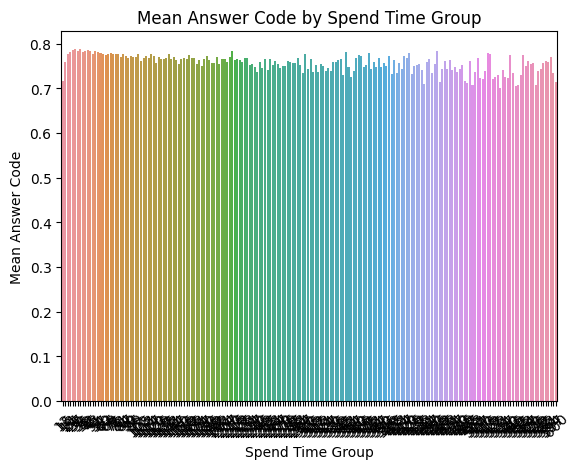

In [64]:
# barplot 그리기
sns.barplot(data=grouped1, x='spend_time_group', y='answer_code')
plt.xlabel('Spend Time Group')
plt.ylabel('Mean Answer Code')
plt.title('Mean Answer Code by Spend Time Group')
plt.xticks(rotation=45)
plt.show()

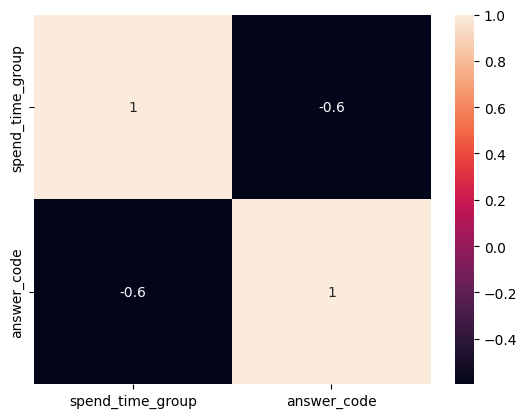

In [67]:
sns.heatmap(grouped1.corr(),annot=True)
plt.show()

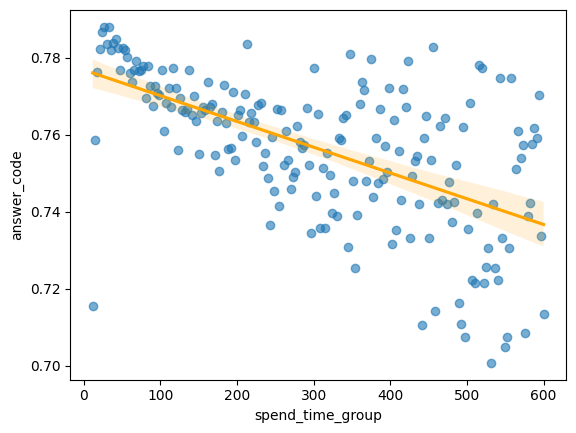

In [66]:
g = sns.regplot(
    data=grouped1,
    x='spend_time_group',
    y='answer_code',
    scatter_kws={'alpha':0.6},
    line_kws={"color": "orange"})

문제를 푸는 시간이 길어질수록 정답률이 낮아진다.

## 1. 문항 번호가 많은 test일수록 마지막 문제의 정답률이 낮아질 것이다.

In [ ]:
df['total_qnum'].nunique()

In [30]:
answerrate_qnum = df.groupby('total_qnum').agg({'answer_code':'mean'}).reset_index()
#answerrate_qnum.columns = ['total_qnum','data_count']
answerrate_qnum

,total_qnum,answer_code
0,2,0.845725
1,3,0.657531
2,4,0.728915
3,5,0.733654
4,6,0.630809
5,7,0.687864
6,8,0.510908
7,9,0.544391
8,10,0.702060
9,11,0.673858


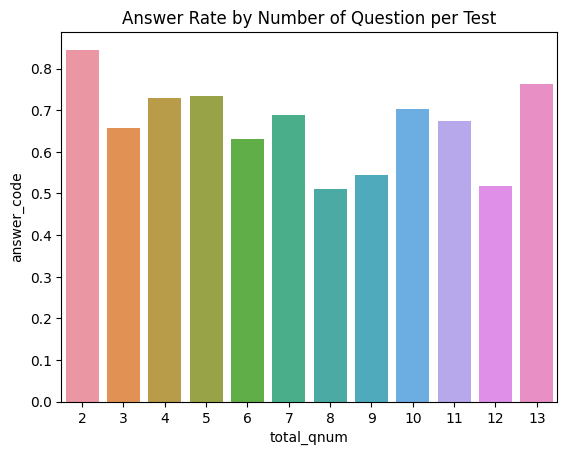

In [32]:
sns.barplot(x='total_qnum',y='answer_code',data=answerrate_qnum)
plt.title('Answer Rate by Number of Question per Test')
plt.show()

각 test의 문항 수에 따른 정답률은 문항 수와 관련없음을 알 수 있다.

## 2. 한 test에 대해 문항번호가 커질수록 즉, 뒷문제를 풀수록 정답률이 낮아질 것이다.

### 문항번호의 범위 확인

In [15]:
df.head()

,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,001,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,002,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,003,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,004,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,005,6


In [58]:
df_subset = df[['test_id','question_numeric_id']]
df_subset['question_numeric_id'] = df_subset['question_numeric_id'].apply(lambda x:int(x))
test_stats = df_subset.groupby('test_id').agg({'question_numeric_id': ['min', 'max']}).reset_index()

<ipython-input-58-13951f44ecc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['question_numeric_id'] = df_subset['question_numeric_id'].apply(lambda x:int(x))


In [59]:
test_stats

test_id question_numeric_id    
                                 min max
0     A010000001                   1   5
1     A010000002                   1   5
2     A010000003                   1   5
3     A010000004                   1   5
4     A010000005                   1   5
...          ...                 ...  ..
1532  A090000070                   1   8
1533  A090000071                   1   8
1534  A090000072                   1   6
1535  A090000073                   1   6
1536  A090000074                   1   6

[1537 rows x 3 columns]

In [ ]:
max_range = test_stats['question_numeric_id']['max'].max() - test_stats['question_numeric_id']['max'].min()
max_range

11

In [ ]:
# 처음 문항 번호가 1이 아닌 경우 확인
test_stats['question_numeric_id']['min'].max()

2

In [ ]:
test_stats['question_numeric_id']['min'].unique()

array([1, 2])

In [60]:
# 첫 문제 번호가 2인 testID가 6개
test_stats[test_stats[('question_numeric_id', 'min')] == 2]

test_id question_numeric_id    
                                 min max
209   A020000018                   2   5
355   A020000164                   2   5
563   A030000178                   2   5
571   A030000186                   2   5
952   A050000171                   2   7
1150  A060000176                   2   7

In [ ]:
# 마지막 문제 범위 확인
test_stats['question_numeric_id']['max'].min()

2

In [61]:
sorted(test_stats['question_numeric_id']['max'].unique())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
# 마지막 문제 번호가 2인 testID 확인
test_stats[test_stats['question_numeric_id']['max'] == 2]

question_number    
                   min max
testID                    
020026               1   2

### plot

In [ ]:
# max값을 기준으로 test를 나누고, 해당 test의 문항별 정답률 평균을 구함.
#즉, columns = [max, question_numeric_id(그냥 정수형으로 변경), answerrate(생성) ]

In [37]:
test_stats

test_id question_numeric_id    
                                 min max
0     A010000001                   1   5
1     A010000002                   1   5
2     A010000003                   1   5
3     A010000004                   1   5
4     A010000005                   1   5
...          ...                 ...  ..
1532  A090000070                   1   8
1533  A090000071                   1   8
1534  A090000072                   1   6
1535  A090000073                   1   6
1536  A090000074                   1   6

[1537 rows x 3 columns]

In [62]:
df_minmax = df.merge(test_stats,on='test_id',how='left')
df_minmax.rename(columns = {('question_numeric_id', 'min'):'min', ('question_numeric_id', 'max'):'max'}, inplace=True)
df_minmax

<ipython-input-62-5b575f463ad0>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_minmax = df.merge(test_stats,on='test_id',how='left')
<ipython-input-62-5b575f463ad0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_minmax = df.merge(test_stats,on='test_id',how='left')


,user_id,question_id,test_id,answer_code,timestamp,knowledge_tag,test_cat,question_numeric_id,total_qnum,min,max
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,001,6,1,7
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,002,6,1,7
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,003,6,1,7
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,004,6,1,7
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,005,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,005,5,1,5
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,001,4,1,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,002,4,1,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,003,4,1,4


In [84]:
qnum_answerrate_subset = df_minmax[['max','question_numeric_id','answer_code']]
qnum_answerrate = qnum_answerrate_subset.groupby(['max','question_numeric_id']).agg({'answer_code':'mean'}).reset_index()
qnum_answerrate['question_numeric_id'] = qnum_answerrate['question_numeric_id'].apply(lambda x: int(x))
qnum_answerrate

,max,question_numeric_id,answer_code
0,2,1,0.784387
1,2,2,0.907063
2,3,1,0.705087
3,3,2,0.557630
4,3,3,0.705731
...,...,...,...
85,13,9,0.847584
86,13,10,0.613383
87,13,11,0.754647
88,13,12,0.368030


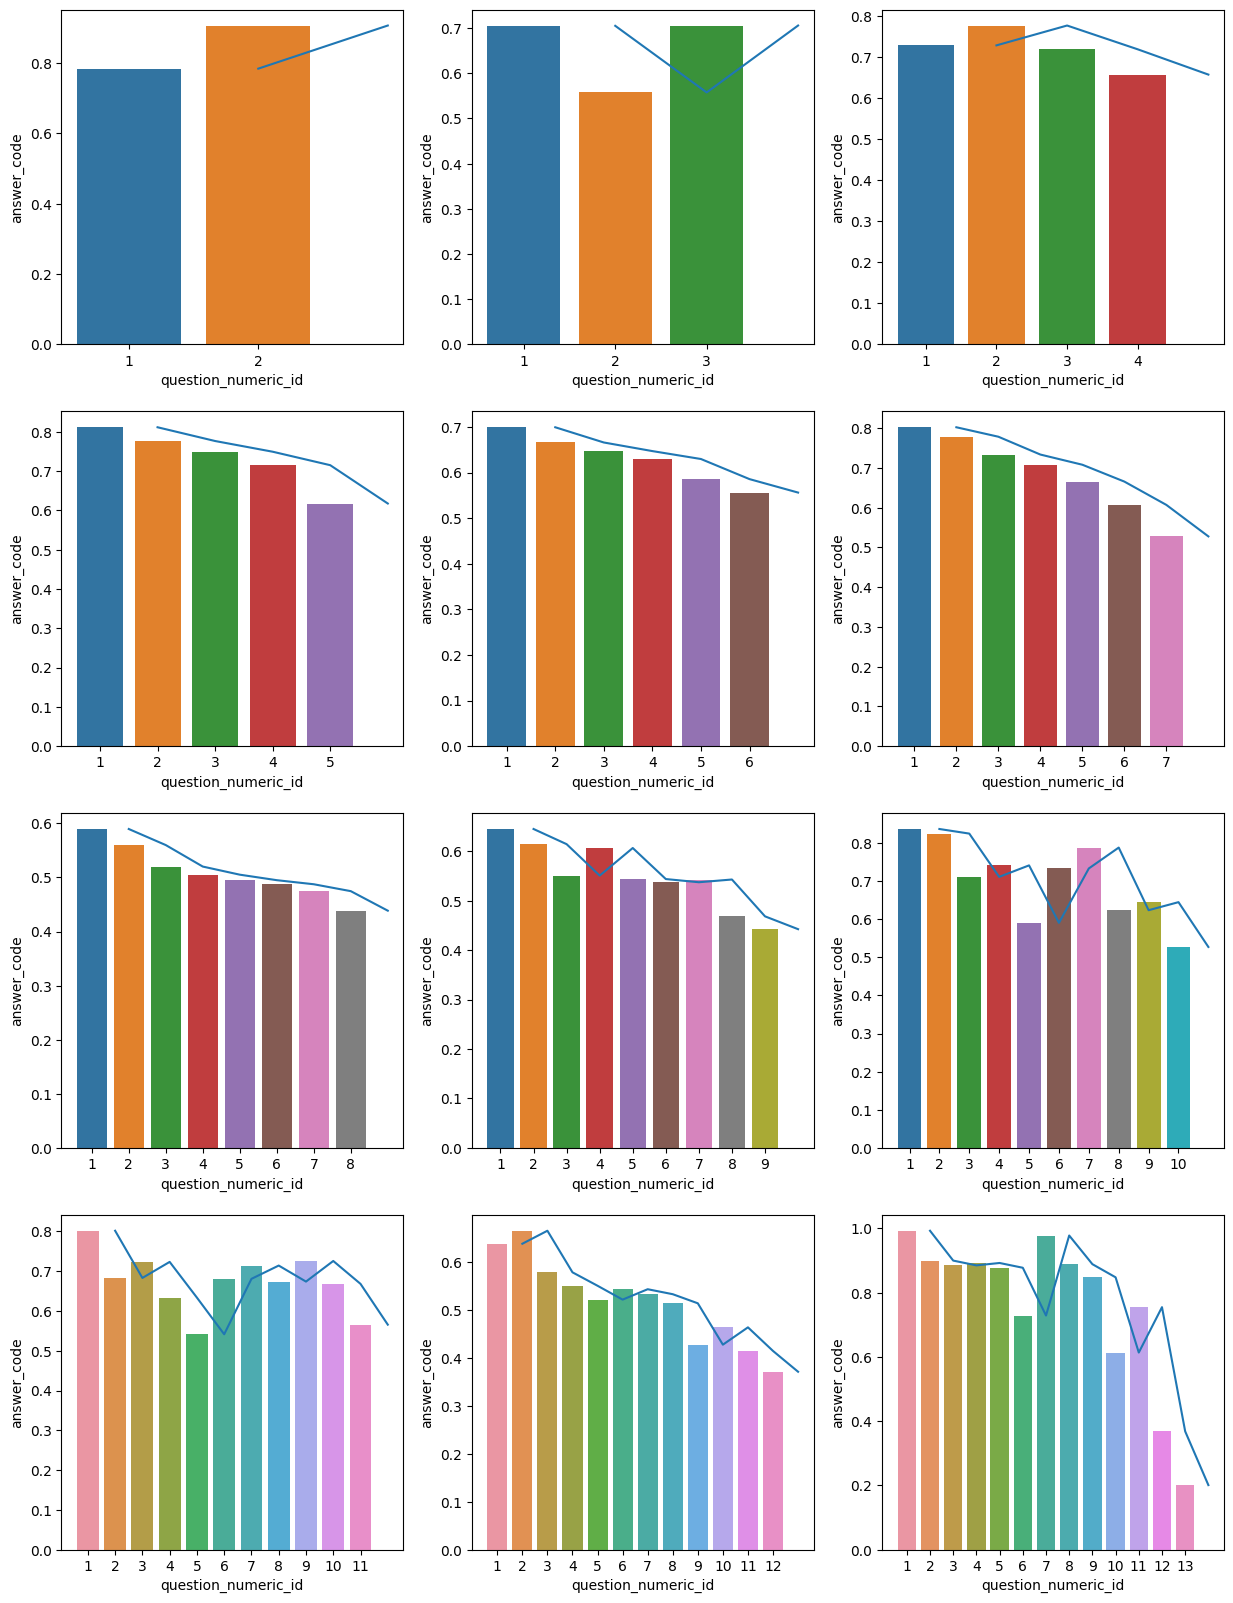

In [91]:
fig,axes = plt.subplots(4, 3, figsize=(15,20))
max_nums = sorted(test_stats['question_numeric_id']['max'].unique())
i, j = 0, 0
for max in max_nums:
  data = qnum_answerrate[qnum_answerrate['max'] == max]
  ax = axes[i,j]
  sns.barplot(data = data, x="question_numeric_id", y="answer_code", ax=ax)
  #ax.set_ylim(0, 1)
  sns.lineplot(data=data, x="question_numeric_id", y="answer_code", ax=ax)

  if j >= 2:
    i += 1
    j = 0
  else:
    j += 1


plt.show()

문항개수가 2,3,4,11인 test를 제외한 나머지 모두, 문항 번호가 커질수록 정답률이 낮아지는 것을 확인할 수 있다.